# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [19]:
df = pd.read_csv("../data/insurance.csv")

In [20]:
print("shape: ", df.shape)
print("columns: ", df.columns)
print(df.info())

shape:  (1338, 7)
columns:  Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [21]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


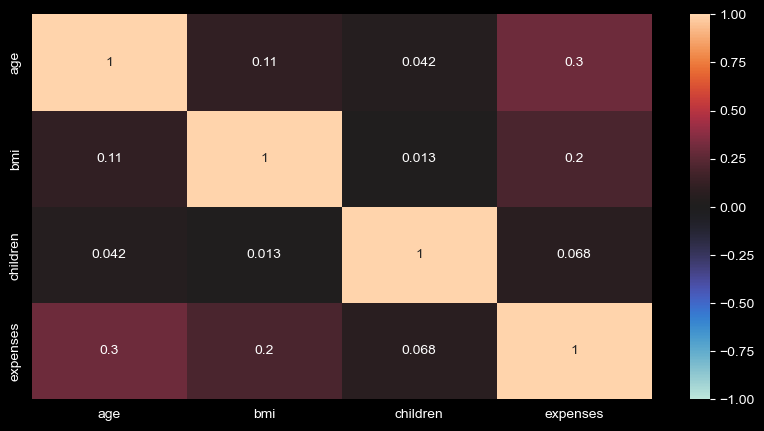

In [22]:
plt.figure(figsize=(10,5))

corr = df.corr(numeric_only=True)
ax = sns.heatmap(corr,vmin=-1,vmax=1,center=0,annot=True)

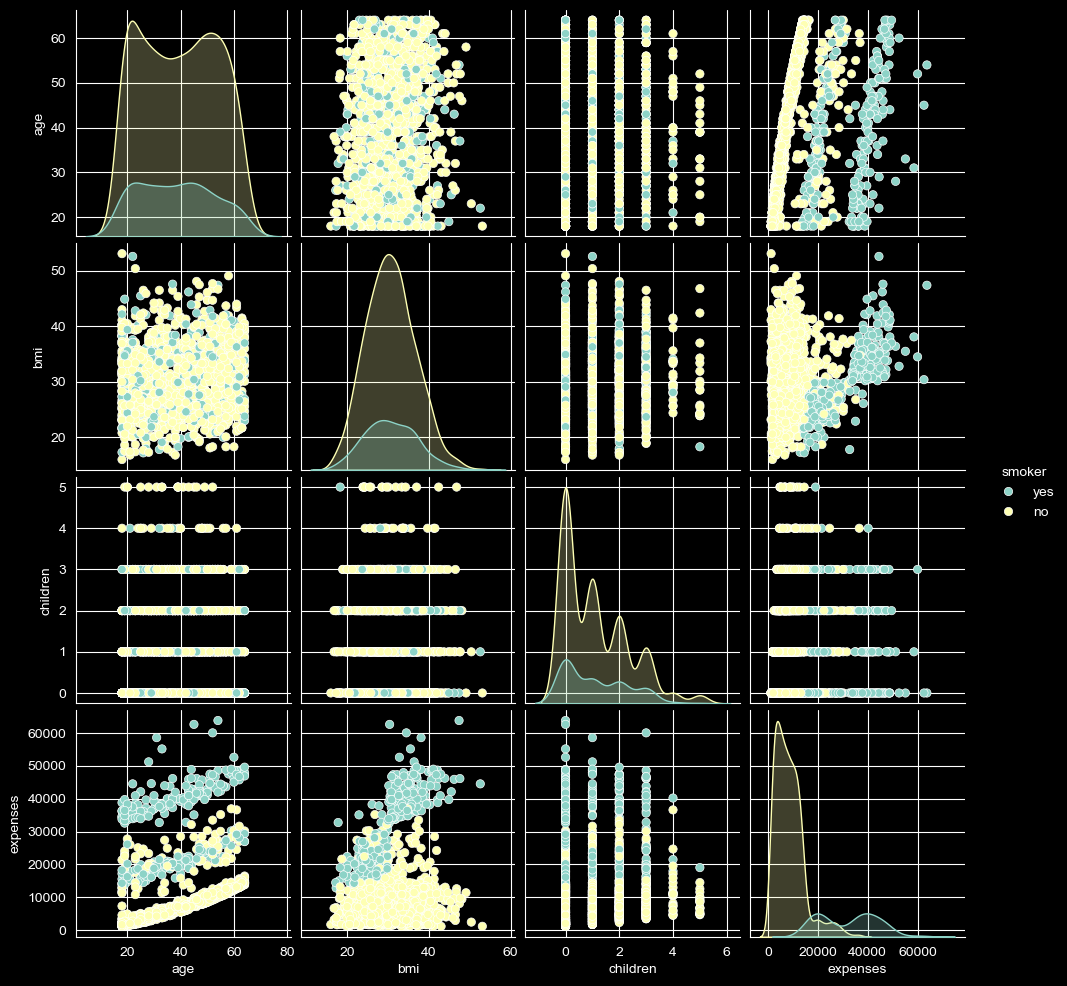

In [23]:
 sns.pairplot(data=df,hue='smoker')

<Axes: xlabel='bmi', ylabel='expenses'>

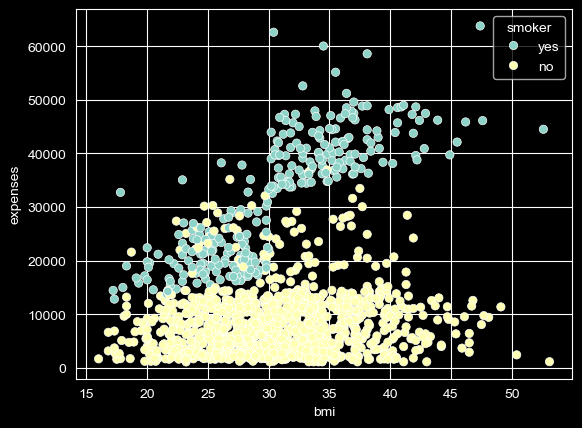

In [24]:
sns.scatterplot(x=df['bmi'], y=df['expenses'], hue=df['smoker'])

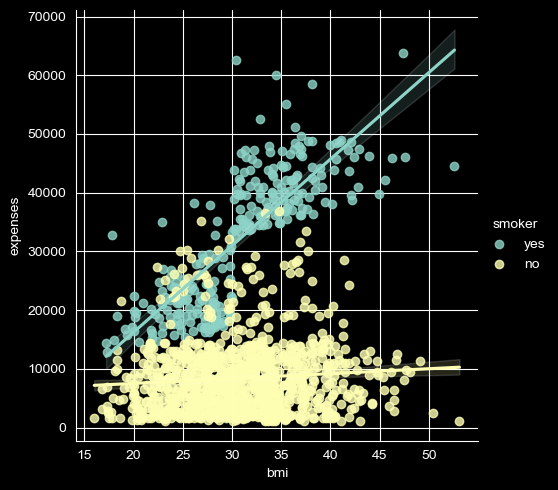

In [25]:
sns.lmplot(x="bmi", y="expenses", hue="smoker", data=df)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder

In [27]:
cat_col=['smoker','region','sex']
num_col=[i for i in df.columns if i not in cat_col]
num_col

['age', 'bmi', 'children', 'expenses']

In [28]:
one_hot=pd.get_dummies(df[cat_col])
insur_procsd_df=pd.concat([df[num_col],one_hot],axis=1)
insur_procsd_df.head(10)

,age,bmi,children,expenses,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male
0,19,27.9,0,16884.92,False,True,False,False,False,True,True,False
1,18,33.8,1,1725.55,True,False,False,False,True,False,False,True
2,28,33.0,3,4449.46,True,False,False,False,True,False,False,True
3,33,22.7,0,21984.47,True,False,False,True,False,False,False,True
4,32,28.9,0,3866.86,True,False,False,True,False,False,False,True
5,31,25.7,0,3756.62,True,False,False,False,True,False,True,False
6,46,33.4,1,8240.59,True,False,False,False,True,False,True,False
7,37,27.7,3,7281.51,True,False,False,True,False,False,True,False
8,37,29.8,2,6406.41,True,False,True,False,False,False,False,True
9,60,25.8,0,28923.14,True,False,False,True,False,False,True,False


In [29]:
insr_procsd_df_label=df
label_encoder = LabelEncoder()
for i in cat_col:
    insr_procsd_df_label[i] = label_encoder.fit_transform(insr_procsd_df_label[i])
insr_procsd_df_label.head(10)

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
5,31,0,25.7,0,0,2,3756.62
6,46,0,33.4,1,0,2,8240.59
7,37,0,27.7,3,0,1,7281.51
8,37,1,29.8,2,0,0,6406.41
9,60,0,25.8,0,0,1,28923.14


In [31]:
X=insur_procsd_df.drop(columns='expenses')
y=df[['expenses']]
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.3,random_state=1234)
model = LinearRegression()
model.fit(train_X,train_y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

print("Predicting the train data")
train_predict = model.predict(train_X)
print("Predicting the test data")
test_predict = model.predict(test_X)
print("MAE")
print("Train : ",mean_absolute_error(train_y,train_predict))
print("Test  : ",mean_absolute_error(test_y,test_predict))
print("====================================")
print("MSE")
print("Train : ",mean_squared_error(train_y,train_predict))
print("Test  : ",mean_squared_error(test_y,test_predict))
print("====================================")
import numpy as np
print("RMSE")
print("Train : ",np.sqrt(mean_squared_error(train_y,train_predict)))
print("Test  : ",np.sqrt(mean_squared_error(test_y,test_predict)))
print("====================================")
print("R^2")
print("Train : ",r2_score(train_y,train_predict))
print("Test  : ",r2_score(test_y,test_predict))
print("MAPE")
print("Train : ",np.mean(np.abs((train_y - train_predict) / train_y)) * 100)
print("Test  : ",np.mean(np.abs((test_y - test_predict) / test_y)) * 100)

Predicting the train data
Predicting the test data
MAE
Train :  4094.4715056018945
Test  :  4190.452194935134
MSE
Train :  36502855.456666924
Test  :  37242969.99679991
RMSE
Train :  6041.759301450772
Test  :  6102.701860389372
R^2
Train :  0.7544304473973156
Test  :  0.7369995351189049
MAPE
Train :  41.132953188237
Test  :  42.52423050653146


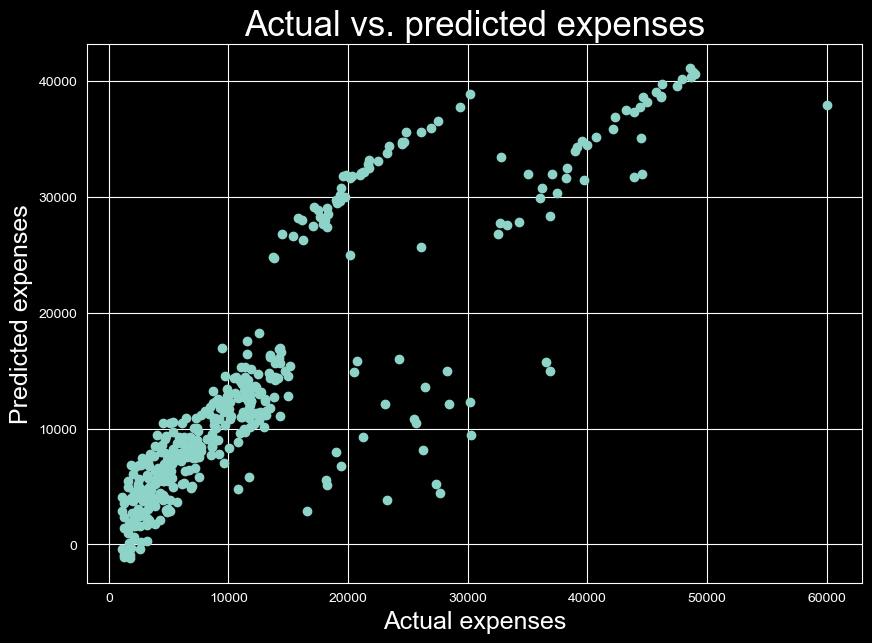

In [34]:
plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted expenses",fontsize=25)
plt.xlabel("Actual expenses",fontsize=18)
plt.ylabel("Predicted expenses", fontsize=18)
plt.scatter(x=test_y,y=test_predict)